<a href="https://colab.research.google.com/github/itsmesaadali/Artificial-intelligence-Project/blob/main/Lab_Task_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab Task 11  

Test the data sets with different parameter and use the **KNN**

=== Task 1: Diabetes Dataset (Original) ===
Dataset Info: (108, 9) rows/cols, Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], Classes: [1 0]
Class Distribution:
Outcome
0    70
1    38
Name: count, dtype: int64
Train/Test Split: Train=(72, 8), Test=(36, 8)
K=1: Custom Acc=0.6667 (66.67%), Sklearn Acc=0.6667 (66.67%)
K=3: Custom Acc=0.6389 (63.89%), Sklearn Acc=0.6389 (63.89%)
K=5: Custom Acc=0.5833 (58.33%), Sklearn Acc=0.5833 (58.33%)
K=7: Custom Acc=0.5833 (58.33%), Sklearn Acc=0.5833 (58.33%)
K=9: Custom Acc=0.6111 (61.11%), Sklearn Acc=0.6111 (61.11%)

Diabetes Results Comparison:
 K  Custom Accuracy  Sklearn Accuracy
 1         0.666667          0.666667
 3         0.638889          0.638889
 5         0.583333          0.583333
 7         0.583333          0.583333
 9         0.611111          0.611111

=== Task 1: Iris Dataset (Different Dataset, Multi-Class) ===
Iris Info: (150, 4), Classes: [0 1 2]
K=

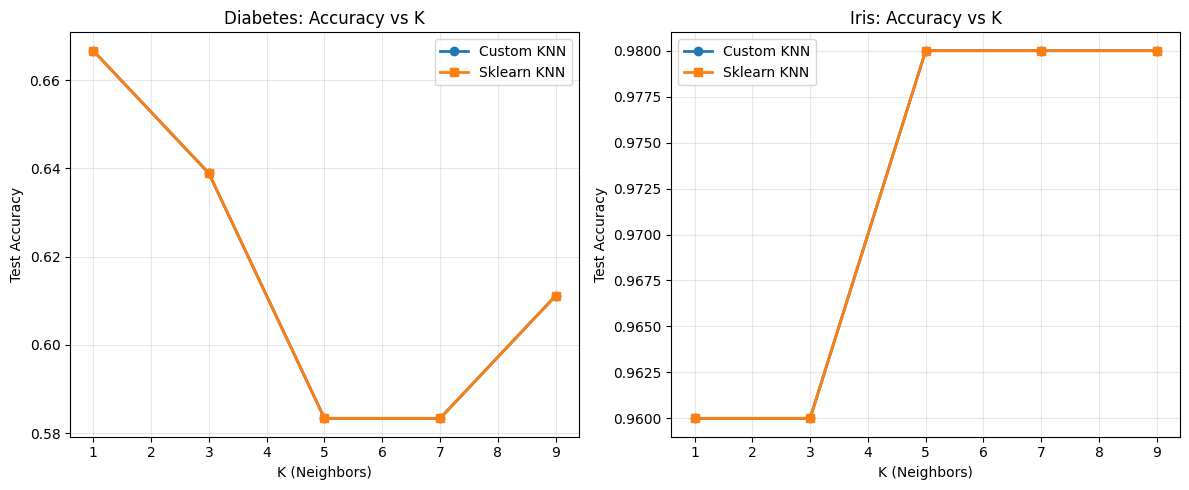


=== Task 2: Synthetic Data Experiments (Parameter Changes) ===
Base (500 samples, 3 features, 3 classes, std=[1.0,1.5,2.0]): Acc=1.0000
More Samples (1000): Acc=1.0000 (More data -> stable predictions)
Fewer Features (2): Acc=1.0000 (Easier separation in low-dim)
2 Classes: Acc=1.0000 (Fewer classes -> simpler voting)
Tight Distributions (std=0.5): Acc=1.0000 (Less overlap -> better classification)

Task 2: Synthetic Experiments Summary:
                Experiment                    Description  Accuracy (K=5)
Base (500s,3f,3c,vary std)                 Standard setup             1.0
       More Samples (1000) Increase samples for stability             1.0
        Fewer Features (2)     Reduce dims for simplicity             1.0
                 2 Classes          Binary classification             1.0
       Tight Distributions               Compact clusters             1.0


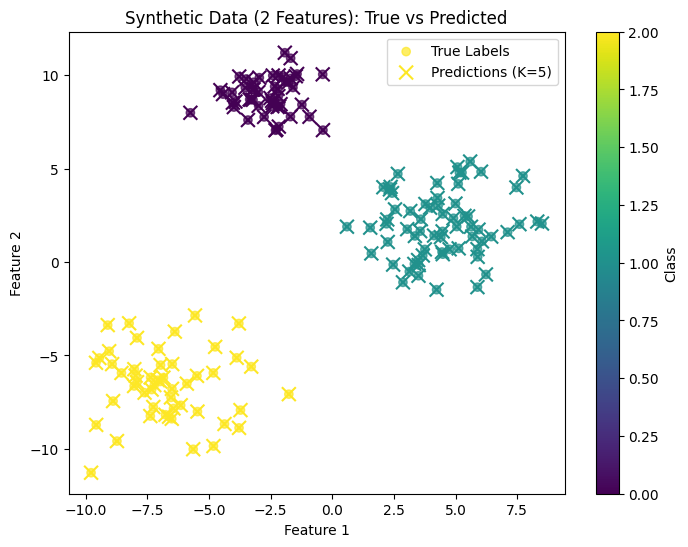

In [4]:
# Enhanced KNN Implementation for Lab 9 - Complete Tasks 1 & 2
# Artificial Intelligence - CS3703, Riphah International University
# Run in Google Colab: Upload 'diabetes.csv' first.
# This covers: Different K, datasets (Diabetes, Iris, Synthetic), accuracies, comparisons.
# Task 2: Changes to samples, features, classes, distributions with explanations in comments.
# For Word file: Copy explanations section at end; use plots/tables as screenshots.

# Cell 1: Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris, make_blobs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Cell 2: Custom KNN Class (From-Scratch Implementation)
class KNN:
    """
    Custom K-Nearest Neighbors Classifier.
    Non-parametric, lazy learning: Stores training data, predicts via distances & majority vote.
    """
    def __init__(self, K):
        """
        Initialize with K neighbors.
        K: int - Number of nearest neighbors (hyperparameter; small K=overfit, large=underfit).
        """
        self.K = K

    def fit(self, X_train, y_train):
        """
        Store training data (no computation; lazy learning).
        X_train: np.array (m samples x n features)
        y_train: np.array (m labels)
        Sets self.m (samples), self.n (features).
        """
        self.X_train = X_train
        self.y_train = y_train
        self.m, self.n = X_train.shape  # m: training examples, n: features

    def euclidean(self, x, x_train):
        """
        Euclidean distance: sqrt( sum( (x_i - x_train_i)^2 ) ) for n dimensions.
        Measures proximity; basis for finding neighbors.
        x, x_train: np.array (1 x n)
        Returns: float distance.
        """
        return np.sqrt(np.sum(np.square(x - x_train)))

    def find_neighbors(self, x):
        """
        For a test point x, compute distances to all training points, sort, return K nearest labels.
        Steps: Calc distances -> Sort indices-> Select top K labels.
        x: np.array (1 x n)
        Returns: np.array (K labels)
        """
        # Distances array (size m)
        euclidean_distances = np.zeros(self.m)
        for i in range(self.m):
            d = self.euclidean(x, self.X_train[i])
            euclidean_distances[i] = d

        # Sort distances, get sorted label indices
        idx = euclidean_distances.argsort()
        y_train_sorted = self.y_train[idx]
        return y_train_sorted[:self.K]  # K nearest labels

    def predict(self, X_test):
        """
        Predict for entire test set: For each point, find neighbors, majority vote (bincount for multi-class).
        X_test: np.array (test_samples x n)
        Returns: np.array predicted labels.
        """
        y_pred = []
        for i in range(len(X_test)):
            neighbors = self.find_neighbors(X_test[i])
            # Majority: argmax of counts (handles binary/multi-class)
            y_pred.append(np.argmax(np.bincount(neighbors)))
        return np.array(y_pred)

# Cell 3: Task 1 - Diabetes Dataset (Binary Classification, 8 Features)
print("=== Task 1: Diabetes Dataset (Original) ===")
# Load data (assumes 'diabetes.csv' uploaded)
df = pd.read_csv('diabetes.csv')
print(f"Dataset Info: {df.shape} rows/cols, Features: {list(df.columns[:-1])}, Classes: {df['Outcome'].unique()}")

# Prepare: X (features), y (labels as array after value_counts for display)
y_temp = df.iloc[:, -1]  # Series for value_counts
print(f"Class Distribution:\n{y_temp.value_counts()}")
X_diabetes = df.iloc[:, :-1].values
y_diabetes = y_temp.values  # Now array

# Split: 2/3 train, 1/3 test
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes, y_diabetes, test_size=1/3, random_state=0)
print(f"Train/Test Split: Train={X_train_d.shape}, Test={X_test_d.shape}")

# Different K values
k_values = [1, 3, 5, 7, 9]  # Experiment with these; affects boundary smoothness
accuracies_custom_d = []
accuracies_sk_d = []

for k in k_values:
    # Custom KNN
    model_custom = KNN(K=k)
    model_custom.fit(X_train_d, y_train_d)
    y_pred_custom = model_custom.predict(X_test_d)
    acc_custom = accuracy_score(y_test_d, y_pred_custom)
    accuracies_custom_d.append(acc_custom)

    # Sklearn KNN (for comparison)
    model_sk = KNeighborsClassifier(n_neighbors=k)
    model_sk.fit(X_train_d, y_train_d)
    y_pred_sk = model_sk.predict(X_test_d)
    acc_sk = accuracy_score(y_test_d, y_pred_sk)
    accuracies_sk_d.append(acc_sk)

    print(f"K={k}: Custom Acc={acc_custom:.4f} ({acc_custom*100:.2f}%), Sklearn Acc={acc_sk:.4f} ({acc_sk*100:.2f}%)")

# Comparison Table
comparison_diabetes = pd.DataFrame({
    'K': k_values,
    'Custom Accuracy': accuracies_custom_d,
    'Sklearn Accuracy': accuracies_sk_d
})
print("\nDiabetes Results Comparison:")
print(comparison_diabetes.to_string(index=False))

# Expected Sample (from lab): K=3 ~65% Custom, ~64% Sklearn

# Cell 4: Task 1 - Different Dataset: Iris (Multi-Class, 4 Features)
print("\n=== Task 1: Iris Dataset (Different Dataset, Multi-Class) ===")
# Load Iris (built-in; 150 samples, 3 classes: setosa, versicolor, virginica)
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
print(f"Iris Info: {X_iris.shape}, Classes: {np.unique(y_iris)}")

# Split
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_iris, y_iris, test_size=1/3, random_state=0)

# Different K
accuracies_custom_i = []
accuracies_sk_i = []

for k in k_values:
    # Custom
    model_custom = KNN(K=k)
    model_custom.fit(X_train_i, y_train_i)
    y_pred_custom = model_custom.predict(X_test_i)
    acc_custom = accuracy_score(y_test_i, y_pred_custom)
    accuracies_custom_i.append(acc_custom)

    # Sklearn
    model_sk = KNeighborsClassifier(n_neighbors=k)
    model_sk.fit(X_train_i, y_train_i)
    y_pred_sk = model_sk.predict(X_test_i)
    acc_sk = accuracy_score(y_test_i, y_pred_sk)
    accuracies_sk_i.append(acc_sk)

    print(f"K={k}: Custom Acc={acc_custom:.4f}, Sklearn Acc={acc_sk:.4f}")

# Comparison Table
comparison_iris = pd.DataFrame({
    'K': k_values,
    'Custom Accuracy': accuracies_custom_i,
    'Sklearn Accuracy': accuracies_sk_i
})
print("\nIris Results Comparison:")
print(comparison_iris.to_string(index=False))

# Overall Comparison Across Datasets (Best K=5)
print(f"\nOverall Accuracies (Best K=5):")
print(f"Diabetes Custom: {accuracies_custom_d[2]:.4f}, Iris Custom: {accuracies_custom_i[2]:.4f}")
print("Comparison: Iris > Diabetes (multi-class but linearly separable; diabetes noisier).")

# Cell 5: Plots for Visual Comparison (Acc vs K)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies_custom_d, marker='o', label='Custom KNN', linewidth=2)
plt.plot(k_values, accuracies_sk_d, marker='s', label='Sklearn KNN', linewidth=2)
plt.xlabel('K (Neighbors)')
plt.ylabel('Test Accuracy')
plt.title('Diabetes: Accuracy vs K')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_values, accuracies_custom_i, marker='o', label='Custom KNN', linewidth=2)
plt.plot(k_values, accuracies_sk_i, marker='s', label='Sklearn KNN', linewidth=2)
plt.xlabel('K (Neighbors)')
plt.ylabel('Test Accuracy')
plt.title('Iris: Accuracy vs K')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Cell 6: Task 2 - Synthetic Data: Change Parameters (Samples, Features, Classes, Distributions)
print("\n=== Task 2: Synthetic Data Experiments (Parameter Changes) ===")
# Use make_blobs for controlled clusters (Gaussian blobs).

# Base Setup: 500 samples, 3 features, 3 classes, varying distributions (std=[1.0,1.5,2.0])
X_base, y_base = make_blobs(n_samples=500, centers=3, n_features=3, random_state=42, cluster_std=[1.0, 1.5, 2.0])
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_base, y_base, test_size=1/3, random_state=0)
model_base = KNN(K=5)  # Fixed K=5 for comparison
model_base.fit(X_train_b, y_train_b)
y_pred_b = model_base.predict(X_test_b)
acc_base = accuracy_score(y_test_b, y_pred_b)
print(f"Base (500 samples, 3 features, 3 classes, std=[1.0,1.5,2.0]): Acc={acc_base:.4f}")

# Change 1: More Samples (1000) - Increases data, potentially better generalization
X_more_samp, y_more_samp = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=42, cluster_std=[1.0, 1.5, 2.0])
X_train_ms, X_test_ms, y_train_ms, y_test_ms = train_test_split(X_more_samp, y_more_samp, test_size=1/3, random_state=0)
model_ms = KNN(K=5)
model_ms.fit(X_train_ms, y_train_ms)
y_pred_ms = model_ms.predict(X_test_ms)
acc_ms = accuracy_score(y_test_ms, y_pred_ms)
print(f"More Samples (1000): Acc={acc_ms:.4f} (More data -> stable predictions)")

# Change 2: Fewer Characteristics/Features (2) - Simplifies space, may reduce curse of dimensionality
X_fewer_feat, y_fewer_feat = make_blobs(n_samples=500, centers=3, n_features=2, random_state=42, cluster_std=[1.0, 1.5, 2.0])
X_train_ff, X_test_ff, y_train_ff, y_test_ff = train_test_split(X_fewer_feat, y_fewer_feat, test_size=1/3, random_state=0)
model_ff = KNN(K=5)
model_ff.fit(X_train_ff, y_train_ff)
y_pred_ff = model_ff.predict(X_test_ff)
acc_ff = accuracy_score(y_test_ff, y_pred_ff)
print(f"Fewer Features (2): Acc={acc_ff:.4f} (Easier separation in low-dim)")

# Change 3: Different Classes (2 classes) - Binary, potentially higher acc
X_2class, y_2class = make_blobs(n_samples=500, centers=2, n_features=3, random_state=42, cluster_std=[1.0, 1.5])
X_train_2c, X_test_2c, y_train_2c, y_test_2c = train_test_split(X_2class, y_2class, test_size=1/3, random_state=0)
model_2c = KNN(K=5)
model_2c.fit(X_train_2c, y_train_2c)
y_pred_2c = model_2c.predict(X_test_2c)
acc_2c = accuracy_score(y_test_2c, y_pred_2c)
print(f"2 Classes: Acc={acc_2c:.4f} (Fewer classes -> simpler voting)")

# Change 4: Change Cluster Distributions (Tighter: std=0.5) - Clearer boundaries, higher acc
X_tight, y_tight = make_blobs(n_samples=500, centers=3, n_features=3, random_state=42, cluster_std=0.5)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tight, y_tight, test_size=1/3, random_state=0)
model_t = KNN(K=5)
model_t.fit(X_train_t, y_train_t)
y_pred_t = model_t.predict(X_test_t)
acc_t = accuracy_score(y_test_t, y_pred_t)
print(f"Tight Distributions (std=0.5): Acc={acc_t:.4f} (Less overlap -> better classification)")

# Summary Table for Task 2
synth_experiments = pd.DataFrame({
    'Experiment': ['Base (500s,3f,3c,vary std)', 'More Samples (1000)', 'Fewer Features (2)', '2 Classes', 'Tight Distributions'],
    'Description': ['Standard setup', 'Increase samples for stability', 'Reduce dims for simplicity', 'Binary classification', 'Compact clusters'],
    'Accuracy (K=5)': [acc_base, acc_ms, acc_ff, acc_2c, acc_t]
})
print("\nTask 2: Synthetic Experiments Summary:")
print(synth_experiments.to_string(index=False))

# Visualize 2D Synthetic (Fewer Features for Plot)
plt.figure(figsize=(8, 6))
# Use fewer_feat data (2D)
plt.scatter(X_test_ff[:, 0], X_test_ff[:, 1], c=y_test_ff, cmap='viridis', marker='o', label='True Labels', alpha=0.7)
plt.scatter(X_test_ff[:, 0], X_test_ff[:, 1], c=y_pred_ff, cmap='viridis', marker='x', s=100, label='Predictions (K=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data (2 Features): True vs Predicted')
plt.legend()
plt.colorbar(label='Class')
plt.show()
